<h1><center>Artificial Neural Networks I</center></h1>
<center><font size="3">This notebook is a part of teaching material for CS-EJ3311 - Deep Learning with Python</font></center>
<center><font size="3">23.10.2023-10.12.2023</font></center>
<center><font size="3">Aalto University & FiTech.io</font></center>

Being a subset of Machine learning (ML) methods, deep learning follows the basic ML principle: find a hypothesis map out of a hypothesis space that minimizes prediction error on any data point. This notebook teaches you how to use an **artificial neural network (ANN)** to represent a hypothesis space that includes highly non-linear functions. By varying the parameters of an ANN we can select different hypothesis maps from the hypothesis space. We train an ANN by tuning its parameters such that resulting hypothesis incurs a minimum average loss on a given set of data points (the training data). The recent popularity of deep learning might be attributed partly to the availability of easy-to-use libraries for the design and training ANN. One such library is provided in the Python package `Keras`(https://keras.io/) and will be the main toolkit for this course. This notebook will show how to use  Keras to train an ANN for a simple classification task. The task is to predict the category for a shop item based on a low-resolution image of the item.

### **Learning Goals.** 

After completing this round, you should:

- understand that ANNs represent non-linear predictor maps that take **features as input and output a predicted label**
- know that ANNs have adjustable/trainable/tunable parameters referred to as **weights** and **biases** 
- understand the functionality of neurons as the main **building blocks of an ANN** 
- understand how ANN parameters are **adjusted (learnt) by minimizing a loss function** using optimization methods (e.g., gradient descent)
- be able **to construct** an ANN using `Keras` 
- be able to **train** the ANN parameters using training data
- be able to **critically evaluate** the quality of the trained ANN 
- be able **to save and load** ANN parameters and whole model

## Additional Reading

- Chapter 3 of "Deep Learning with Python" by F. Chollet. 
- Chapter 10 of "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" by Aurélien Géron.

## Additional Materials

- youtube videos [Activation Functions (C1W3L06)](https://www.youtube.com/watch?v=Xvg00QnyaIY) and [Why Non-linear Activation Functions (C1W3L07)](https://www.youtube.com/watch?v=NkOv_k7r6no) Andrew Ng course


## The Big Picture

Remember the goal of ML: **find a hypothesis that allows to predict the label of a data point based on its features**. Mathematically, a hypothesis is nothing but a map $h$ that reads in the features $\mathbf{x}$ of a data point and outputs a prediction $h(\mathbf{x})$ of its label. What sets deep learning methods apart from other ML methods is their common approach for representing a hypothesis map. Deep learning use a signal-flow chart representation, referred to as an artificial neural network, to represent a hypothesis map $h$. This signal-flow chart consists of interconnected elementary units (neurons) that include tunable parameters, referred to as weights and biases. 

## Artificial Neurons - The Atom of Artificial Neural Networks

As its name indicates, an ANN is a network of interconnected elementary computational units. These computational units are referred to as **artificial neurons** or just **neurons**, **nodes** or **units**. The simplest ANN consists of a single artificial neuron:  

<center><img src="../../../coursedata/ANN/perceptron.png" width="500"><center>
    
Let us assume that the neuron has three inputs $x_1,x_2,x_3$. These inputs are weighted using the weights $w_1,w_2,w_3$ and summed up in the intermediate quantity 
$$z = b+w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3} $$ 

Note that we also added a constant term $b$ to the weighted inputs. This term is often referred to as a **bias** or **offset**. Instead of including the bias term we could equivalently add an input $x_0$ and define its value to be fixed to $x_0=1$. The corresponding weight $w_0$ would then take the role of the bias $b$ in the above equation and we can express the same computation as a dot product of vectors $\mathbf{w}$ and $\mathbf{x}$:

$$z = \mathbf{w}^{T}{x}$$


<center><img src="../../../coursedata/ANN/dotprod.png" width="700"></center>

The artificial neuron then applies a [non-linear function](https://study.com/cimages/multimages/16/linear_function_vs_nonlinear_function.png) called **activation function** $g(\cdot)$ to the weighted sum $z$. The final output of the neuron is the function value $g(z)$, referred to as the **activation** of the neuron. The activation function $g(\cdot)$ is a design parameter that could be optimized using any method for hyperparameter turning. However, most deep learning methods use one of few popular choices for the activation function. 

In general deep learning methods use non-linear activation functions $g(\cdot)$. Indeed, if we would use a linear activation function $g(z) = a z + b$, any ANN (no matter how many neurons it contains) can only produce a linear map between its input and output.  A less trivial choice for the activation function is the **sigmoid function** $g(z) = 1/(1+e^{-z})$. Another popular choice for the activation function is the **rectified linear unit** (ReLU) $g(z) = \mbox{max} \{z,0\}$.

In [1]:
import numpy as np                   # provides methods for processing and manipulating numerical arrays
import matplotlib.pyplot as plt      # provides tools for plotting data

from utils import load_styles

# This MUST be the last line of this cell
load_styles()

<a id='1.1'></a>
<div class=" alert alert-success">
    <h3><b>Student Task 1.1.</b> Build an Artificial Neuron.</h3> 

[Points: 0.5p]

This task requires you to implement a single artificial neuron. 
    
The feature vector of the data point is stored as a numpy array `x` of shape `(3,1)`, i.e., the feature $x_{1}$ is given by `x[0,0]`, the feature $x_{2}$ by `x[1,0]` and feature $x_{3}$ by `x[2,0]`. Similarly the weight vector is stored as a numpy array `w` of shape `(3,1)` and the bias as a `float` variable `b`. 

Your task is to complete the Python snippet by: 

- computing the weighted sum of input $z = b+w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}$, given the weight vector **w** and bias $b$
- applying sigmoid activation $g(z) = 1/(1+e^{-z})$ to a weighted sum $z$

Note: 
- the shapes (3,1) of vectors $\mathbf{x}$ and $\mathbf{w}$ are **intentional**. Use transpose to compute dot product $\mathbf{w}^{T}\mathbf{x}$.
- $z$ and $g$ should be a floating-point numbers, not a numpy array, i.e reshape and/or unpack array if needed.


</div>

<details>
    <summary>
        <span class="summary-title">Hints</span>
    </summary>
    <div class="summary-content">
    <br>
    <ul>
       <li>
           To compute the weighted sum you may use the dot product between feature vector <strong>x</strong> and weight vector 
           <strong>w</strong>. You can use numpy function <code>np.dot()</code> or the operator <code>@</code> to compute the dot product 
           between two vectors stored in numpy arrays. Remember to use transpose operation in order to get compatible shapes for <code>np.dot()</code> or <code>@</code>.
           <br><br>
           Alternatively, you can perform the operation manually element-by-element and sum up 
           the result.
       </li>  
        <br><br>
       <li>
               You can compute the exponential function  <i>e<sup>a</sup></i>, for some number <i>a</i>, using the numpy function <code>np.exp(a)</code>
        </li>    
     </ul>
     </div>    
</details>


In [6]:
# feature vector of shape (3,1)
x = np.array([0.14, 0.2, -5]).reshape(3,1)

# bias
b = 0.5

# weight vector of shape (3,1)
w = np.array([10, 5, 0.3]).reshape(3,1)

# remove the line raise NotImplementedError() before testing your solution and submitting code
# YOUR CODE HERE


# Compute the weighted sum
z = float(np.dot(w.T, x) + b)

# Apply the sigmoid function to the weighted sum
g = 1 / (1 + np.exp(-z))


# print the results
print(f"The output is: {g:.4f}, {z:.4f}")

The output is: 0.8022, 1.4000


In [4]:
# Perform some sanity checks on the solution

assert isinstance(z, np.floating), "z should be a floating-point number!"
assert isinstance(g, np.floating), "g should be a floating-point number!"
assert g <1, "Value of g is incorrect!"
assert g >0, "Value of g is incorrect!"

print("Sanity checks passed!")

AssertionError: z should be a floating-point number!

In [7]:
# this cell is for hidden test


In [8]:
# this cell is for hidden test


## Organizing Neurons as Layers 

Deep learning methods use ANNs containing billions of interconnected neurons. It turns out to be beneficial, both statistically and computationally, to not allow for completely arbitrary connections between neurons but require a particular global order or architecture. Many of the most successful deep learning methods use ANNs that consist of consecutive layers of neurons. Each layer is made of multiple individual neurons whose input is the outputs of neurons in the previous layer. We refer to ANN that consist of a sequence or chain of many layers as **deep neural networks**. 

There has been some recent progress in the understanding of the statistical and computational properties of deep nets. However, we are still lacking a solid theory for guiding the choice of the number of layers (the depth of ANN) and the size of layers (width) for a given dataset. In practice, the application of deep learning methods still requires a lot of manual experimentation ("trial and error"). A typical approach to applying deep learning is to start from an existing ANN structure that has been proven useful for related datasets and then modify (tailor) it to the application at hand (we will discuss this in the notebook Transfer Learning). 

The figure below illustrates an ANN with four layers: input layer, two hidden layers, and output layer. The hidden layers are called "hidden" because in contrast to input and output layers we cannot directly access the inputs and outputs of the hidden layers. The neurons of the hidden layers are called hidden neurons.

The index in the braces indicates to which layer the parameters belong to.

**Input layer**. A convention of the deep learning literature is to refer to the input  $x_{1},\ldots,x_{n}$ of an ANN as the input layer. This input layer consists solely of the individual features of a data point. The input layer sends these features directly to the first hidden layer. The example below includes 3 features values $x_{1},x_{2},x_{3}$.

**First hidden layer**. This layer consists of five neurons. Inputs for a neuron in this layer are the outputs of each neuron in the previous layer. These type of layers are therefore called **fully connected** or **dense layers**. For each hidden neuron we compute linear combination of vectors $\mathbf{w}$ and $\mathbf{x}$ (i.e. weighted sum of feature values) and apply non-linearity to the obtained result.

**Second hidden layer**. Similar to first hidden layer, this layer is fully connected to its preceding layer.  Inputs for a neuron in this layer are the outputs of the hidden neurons in the previous layer. Again, we compute linear combination of a weight vector (weight values between 1st and 2nd hidden layers) and input vector (output of the first hidden layer) and apply non-linearity to the obtained result.

**Output layer**. In this particular example, the final layer consists of just one output neuron. The output value may represent the confidence (probability) in assigning the data point to a positive class (binary classification). In the case of regression problem, output neuron returns only the weighted sum (activation function is not used).


<img src="../../../coursedata/ANN/ANN.png" width="700">

## A Closer Look At Activation Functions

As we discussed before, a neuron applies a non-linear activation function to weighted sum of its inputs. You will rarely encounter an ANN using linear activation functions or even omitting the activation function and directly using the weighted sum of the input as the neuron output. Indeed, an ANN using only linear activation functions can only implement a linear map from the input features to the output. No matter how many layers we stack on top of each other, the overall behavior of the ANN will always be a linear map. \
For example, let's take a simple ANN with two neurons in a hidden layer and one output neuron without adding any activation function. For a data point with only one feature $x$ the hidden neurons will output weighted sums $z_{1} = b^{(1)}_{1}+w^{(1)}_{1}x$ and $z_{2} = b^{(1)}_{2}+w^{(1)}_{2}x$, where $b^{(1)}_{1}$ and $w^{(1)}_{1}$ are the bias and weight for a first hidden neuron and $b^{(1)}_{2}$ and $w^{(1)}_{2}$ are the bias and weight for a second hidden neuron. The index in the braces indicates to which layer the parameters belong to.\
The figure below shows the outputs of these hidden neurons (blue line) for a range of values $x \in \{-10,10\}$. The output of the last neuron can be described as a function $h(x) = b^{(2)}_{1}+w^{(2)}_{1}z_{1}+w^{(2)}_{2}z_{2}$, which is just a linear combination of $z_{1}$ and $z_{2}$. In other words, it doesn't matter how we will change the bias and weight values of the neurons - the network will always return a linear predictor.

<center><img src="../../../coursedata/ANN/lincomb.png" width="800"></center>

<a id='1.2'></a>
<div class=" alert alert-success">
    <h3><b>Student task 1.2.</b> Combining Linear Functions gives a Linear Function.</h3> 

[Points: 0.25p]
    
This task requires you to implement a hypothesis map $h(x)$ using the simple ANN depicted in the figure above. The weights and bias terms of the neurons in the hidden layer are, respectively, fixed to $b^{(1)}_{1}=-2, \;w^{(1)}_{1}=-1,b^{(1)}_{2}=-2, w^{(1)}_{2}=1$ . For the weights and bias terms of the output neuron, use $b^{(2)}_{1}=0.5,  \;w^{(2)}_{1}=5,  \;w^{(2)}_{2}=3$. Apply the resulting map $h(x)$ to the feature values stored in the feature matrix `X` which is already defined in the code snippet below. 

**Note!**

- Here a datapoint has only one feature and feature values of all (100) datapoints are stacked in the feature matrix `X` of shape `(100,1)`. The entry `X[0]` represents the feature vector (n=1) of the first data point, the entry `X[1]` is the feature vector of the second data point and so on. 


- The resulting numpy array `h` should also be of shape `(100,1)`.
    
- Carefully check variables' names  ($b^{(1)}_{2}$ is b12 in the code, $b^{(2)}_{1}$ is b21 etc.)
</div>

<details>
    <summary>
        <span class="summary-title">Hints</span>
    </summary>
    <div class="summary-content">
    <br>
    Expected graph:
    </div> 
    <img src="../../../coursedata/ANN/1.2.png" width="600">
</details>

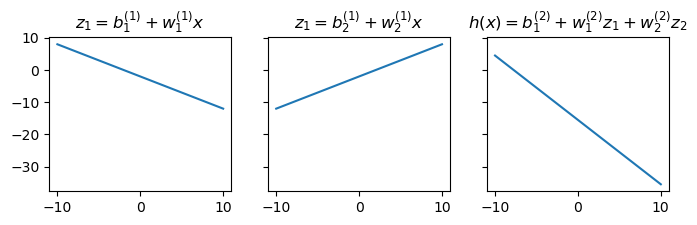

In [9]:
# feature matrix X of shape (m,n)
# where m=100 and n=1 (i.e. each datapoint has only one feature)
X = np.linspace(-10, 10, 100).reshape(100,1)

# weight and bias of 1st hidden neuron
w11, b11 = -1, -2
# weight and bias of 2nd hidden neuron
w12, b12 = 1, -2

# weights and bias of output neuron
b21 = 0.5
w21, w22 = 5, 3

# YOUR CODE HERE
# Compute the weighted sum for the two hidden neurons
z1 = b11 + w11 * X
z2 = b12 + w12 * X

# Compute the weighted sum of the hidden neurons' outputs (without activation)
h = b21 + w21 * z1 + w22 * z2

# plot outputs of neurons
fig, axes = plt.subplots(1,3, sharey=True, figsize=(8,2))

# output of first hidden neuron
axes[0].plot(X, z1)
# output of second hidden neuron
axes[1].plot(X, z2)
# output of output neuron
axes[2].plot(X, h)

axes[0].set_title('$z_{1} = b^{(1)}_{1} + w^{(1)}_{1}x$', fontsize=12)
axes[1].set_title('$z_{1} = b^{(1)}_{2} + w^{(1)}_{2}x$', fontsize=12)
axes[2].set_title('$h(x) = b^{(2)}_{1} + w^{(2)}_{1}z_{1} + w^{(2)}_{2}z_{2}$', fontsize=12)

plt.show()

In [10]:
# Perform sanity checks on the solution
assert h.shape == (100,1), "Shape h should be (100,1)"
assert (h[42]<-10)&(h[0]<5), "Values of h are incorrect!"

print("Sanity checks passed!")

Sanity checks passed!


In [11]:
# this cell is for hidden test



Thus, using ANNs with linear activation functions is equivalent to using linear predictor maps. No matter how many layers we add, as long as we only use linear activation functions, we end up with a linear map from the features of a data point to its predicted label. However, in many relevant applications, the relation between features (e.g., colour intensities of image pixels) and label (e.g., presence of a cat in the image) is highly non-linear.

To learn non-linear predictor maps, we need to use ANNs with non-linear activation functions. There are no widely applicable guidelines that suggest which particular activation function to use for a given application. However, some choices have been proven useful in many application domains. Two such choices for the activation function are the 

\begin{equation} 
\mbox{rectified linear unit (ReLU) } g(z) = {\rm max} \{0,z\}, 
\end{equation}

and the 

\begin{equation} 
\mbox{sigmoid function } g(z) = 1/(1+{e}^{-z}). 
\end{equation} 

\
<img src="../../../coursedata/ANN/activation.png" width="600">


You can find plots of other popular choices for the activation function [here](https://cdn-images-1.medium.com/max/1000/1*4ZEDRpFuCIpUjNgjDdT2Lg.png). 

Learning the weights for a single neuron with a sigmoid activation function, and using the cross-entropy loss, is equivalent to logistic regression. You can find more details about cross-entropy loss [here](https://machinelearningmastery.com/cross-entropy-for-machine-learning/). Background on logistic regression is provided in Chapter 3 of [http://mlbook.cs.aalto.fi](https://github.com/alexjungaalto/MachineLearningTheBasics/blob/master/MLBasicsBook.pdf). 

The figure below indicates how using neurons with ReLU activation function results in a non-linear map between the input and the output of ANN. ReLU activation function is applied to the output of the two hidden neurons $z_{1} = b_{1}^{(1)}+w_{1}^{(1)}x$ and $z_{2} = b_{2}^{(1)}+w_{2}^{(1)}x$, thus introducing nonlinearity to the network. The output neuron then can generate non-linear predictor by combining the output of the hidden neurons with activation function: 

$h(x) = b_{1}^{(2)}+w_{1}^{(2)}g(z_{1}) +w_{2}^{(2)}g(z_{2})$

Using a sufficiently large number of hidden layers and more neurons within an ANN allows us to accurately learn highly non-linear relations between the input features and the output of an ANN. From a computational complexity point of view, the relevant parameter is not the number of neurons but the number of connections (links) between the neurons. The strength or weight of these connections must be adjusted (learned) by optimization methods. The more weights to be adjusted, the more computational resources (memory, processing time) are required during the training. The more computational resources the more expensive the training becomes.

<img src="../../../coursedata/ANN/relucomb.png" width="800">

<a id='1.3'></a>
<div class=" alert alert-success">
    <h3><b>Student task 1.3.</b> Combination of non-linear functions.</h3>

[Points: 0.25p]

Modify previous task to add non-linearity: apply ReLU activation function max(0,x) to outputs of hidden neurons `z1` and `z2`.     
</div>

<details>
    <summary><span class="summary-title">Hints</span></summary>
    <div class="summary-content">
    To apply ReLU function max(0,x) to an array, you can use <code>np.maximum(0, array)</code> function to do element-wise comparison between zero and <code>z1</code>, <code>z2</code> arrays.
    <br>
    Expected graph:
    </div> 
    <img src="../../../coursedata/ANN/1.3.png" width="600">
</details>

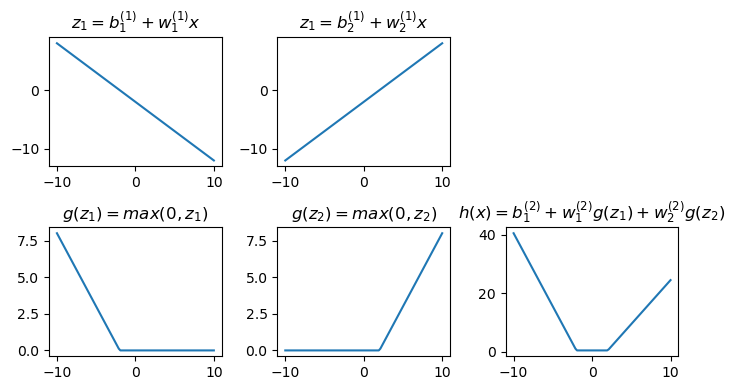

In [16]:
# YOUR CODE HERE
# Apply ReLU activation function to z1 and z2
g1 = np.maximum(0, z1)
g2 = np.maximum(0, z2)

# Compute the weighted sum of the hidden neurons' outputs
h = b21 + w21 * g1 + w22 * g2

# plot outputs of neurons
fig, axes = plt.subplots(2,3, figsize=(7,4))

axes[0,0].plot(X, z1) # weighted sum of first hidden neuron
axes[0,1].plot(X, z2) # weighted sum of second hidden neuron
axes[0,2].axis('off') # hide axis of extra subplot

axes[1,0].plot(X, g1) # activation of first hidden neuron
axes[1,1].plot(X, g2) # activation of second hidden neuron
axes[1,2].plot(X, h) # output 

axes[0,0].set_title('$z_{1} = b^{(1)}_{1} + w^{(1)}_{1}x$', fontsize=12)
axes[0,1].set_title('$z_{1} = b^{(1)}_{2} + w^{(1)}_{2}x$', fontsize=12)
axes[1,0].set_title('$g(z_{1}) = max(0,z_{1})$', fontsize=12)
axes[1,1].set_title('$g(z_{2}) = max(0,z_{2})$', fontsize=12)
axes[1,2].set_title('$h(x) = b^{(2)}_{1} + w^{(2)}_{1}g(z_{1}) + w^{(2)}_{2}g(z_{2})$', fontsize=12)

fig.tight_layout()
plt.show()

In [17]:
# Perform some sanity checks on the solution
assert h.shape == (100,1), "reshape h to (100,1)"
assert (h[42]<1)&(h[0]<45), "Values of h are incorrect!"

print("Sanity checks passed!")

Sanity checks passed!


In [18]:
# this cell is for hidden test


The sigmoid function is a popular choice for the activation function of the neurons in the final or output layer. Indeed, the value range of the sigmoid function is the interval of real numbers between $0$ and $1$. Thus, we can interpret the output of the sigmoid activation function as a probability or degree of belonging to a certain class or category. For the neurons in the hidden layers, the ReLU activation function is a popular choice. 


<img src="../../../coursedata/ANN/activation_layers.png" width="700">

The ANN depicted above contains an output layer with neurons with a sigmoid activation function. Each of these three output neurons could represent the degree of belonging to a certain class. The top neuron could represent the class "Car" (vs. "No Car"), the middle neuron the class "Tree" (vs. "No Tree"), and the bottom output neuron the class "Fish" (vs. "No Fish"). This representation of class labels is useful when the data point can belong to several classes at the same time (**multilabel classification**). For example, when you need to identify which objects are present on the image. There might be no cat, tree, or car present in the picture or might be only cats or two objects, car and cat, etc.

**Binary classification** problems on the other hand, involve data points that might belong to only two classes. We represent the class of a data point by single label $y$. For example $y=1$ could mean "cat" image and $y=0$ means a "no cat" image. Each image is then placed into either category "cat image" or "no cat image". For binary classification, we migh use ANNs having a single output neuron with sigmoid activation. The output of sigmoid function is a real number between $0$ and $1$ and can be interpreted as probability of belonging to "positive" class $p(y=1)$. Probability of belonging to "negative" class is then $p(y=0)=1-p(y=1)$. 

Beside multilabel and binary classification problems, we also consider **multiclass classification** problems. Here, data points belong to exactly one out of more than two possible classes. For such multiclass classification we might use ANNs having output neurons with a **softmax** activation function. Similar to ANNs for **multilabel classification**, we also use more than one output neuron. However, in contrast to multilabel classification these output neurons are not working independently but are coupled via the **softmax** activation function

\begin{equation}
g_{i} = \frac{\exp(z_{i})}{\sum_{j} \exp(z_{j})}. 
\end{equation} 
Here, $g_{i}$ the output of the $i$th neuron in the output layer and the sum ranges over all neurons in that output layer. The quantity $z_{i}$ denotes the weighted input fo the $i$th output neuron.

The softmax depends on all neurons belonging to the same layer. The probabilities of belonging to a certain class returned by softmax are summed up to 1, while this is not a case for multilabel classification. 

Let us illustrate the difference between using output neurons with independent sigmoid activation (**multilabel classification**) and using output neurons with coupled softmax activation (**multiclass classification**) by an example. We want to label images according to three categories "car", "tree" and "fish". We might either want to divide them into those categories (which is a **multiclass classification** problem) or we want to caption each image by objects shown in that image (which is a **multilabel classification** problem). 

For example, three neurons with sigmoid activation can return something like this:
- probability of car being on the image 0.2
- probability of tree being on the image 0.8
- probability of fish being on the image 0.9

Note, that total probability is not summing up to 1.\
Here we conclude, that a tree and a fish are on the picture, but not a car (given threshold of probability 0.5).

Three neurons with softmax activation can return something like this:
- probability of car being on the image 0.2
- probability of tree being on the image 0.7
- probability of fish being on the image 0.1

Note, that total probability is summing up to 1.\
Here we conclude, that tree is on the picture, as it has highest probability. 

In conclusion, beware that the output layer and accompanying activation function defines the type of predictions that the network makes (classes are not mutually exclusive vs classes are mutually exclusive) and hence its purpose (multilabel vs multiclass classification).

Here is a reference table from "Deep Learning with Python" F.Chollet:

<img src="../../../coursedata/ANN/chollet.png" id='table'/>

<div class="alert alert-success">
    <h3><b>Check yourself: </b>Activation functions of the last (output) layer.</h3>

**Case 1**
    
You need to classify images into classes {cat, dog, rabbit}. Classes are mutually exclusive, i.e. there is only one class category per image. 
    
**Case 2**
    
You need to classify images into classes {cat, dog, rabbit}. Classes are NOT mutually exclusive, i.e. there can be multiple categories (or none) per image. 
    
**Case 3**
    
You need to classify images into classes {cat, dog}. Classes are mutually exclusive, i.e. there is only one category per image. 
    
**Case 4**
    
You need to predict company profit for the next year based on historical data.
  
        
Assume that you are using ANN to solve these tasks. For each case define:
    
- How many neurons should be in the output layer? 
- Which activation function you will use in the output layer?

</div>

<details>
    <summary><span class="summary-title">Solutions.</span></summary>
    <div class="summary-content">
        
**Case 1**: 3 neurons with softmax activation.
        
Here, **score(s)** – output of the last layer neuron(s) before applying activation function. 

<img src="../../../coursedata/ANN/multiclass.png"/>
<br>
        
**Case 2**: 3 neurons with sigmoid activation.

<img src="../../../coursedata/ANN/multilabel.png"/>
<br>  
        
**Case 3**: 1 neuron with sigmoid activation. 
        
<img src="../../../coursedata/ANN/binary.png"/>
<br>
        
**Case 4**: 1 neuron with no activation.
     
<img src="../../../coursedata/ANN/regression.png"/>  
<br>
        
</div> 
</details>

<div class=" alert alert-success">
    <h3><b>Try it out: </b>Activation functions.</h3>

Let's demonstrate further what you've learned with an interactive neural network. Go to TensorFlow playground https://playground.tensorflow.org/ . Use the following parameters:

- dataset - Gaussian
- features ${X}_{1}$ and ${X}_{2}$
- 2 hidden layers with 6 units each, coupled with **linear** activation function
- learning rate 0.01
    
Train for about ~100 epochs. Note train and test loss values. Does ANN able to separate distinct classes? Data points are separated well if the area with the majority of orange points is colored bright orange and a zone with blue points is colored bright blue. If coloring is pale orange or pale blue, it means that ANN is not sure to which class data point belongs.
    
Now try out Circle dataset. What do you observe? ANN with linear activation functions does not perform very well on a linearly inseparable dataset. What about if we will add some non-linear activation (ReLU or tanh)?
</div>

## ANN Training - Finding Good Weights 

Consider a given ANN structure with a certain number of hidden layers and each layer consisting of many interconnected neurons. To use the ANN we also need to specify the weights for the connections between the neurons. This specification is typically done by optimization methods (referred to as [**optimizers**](https://keras.io/api/optimizers/#available-optimizers)). These methods tune the weights $\mathbf{w}$ to minimize the average loss $f(\mathbf{w})$ obtained by applying the ANN with weights $\mathbf{w}$ to a training set consisting of labeled data points. These training data points are referred to as **training samples** or **training set**.

It turns out that a very successful method to find good values for the weights is to use gradient-based optimization methods. These family of algorithms will be the main subject of the next notebook. For now we just mention that the idea of these methods is to iteratively update the current weight values based on (approximations of) the gradient of the training loss $f(\mathbf{w})$. 

A key step of any gradient based method is the computation of gradients $\nabla f(\mathbf{w})$. The computation of gradients typically requires evaluating the ANN output for each data point in the training set. Training set might consist of billions of images stored in data centers all over the planet. Deep learning methods therefore do not compute exact gradients but ("stochastic") approximations using randomly chosen subsets ("batches") of the training set. Each iteration ("gradient step") of these methods uses only a small subset (batch) of training samples. After a certain number of iterations, which is referred to as an **epoch**, each training sample has been contained in one of these batches. 

To sum up ( <a href='http://faroit.com/keras-docs/2.0.2/getting-started/faq/#what-does-sample-batch-epoch-mean'>see keras docs </a>):

- **Sample**: one element of a dataset.\
  Example: one image is a sample in a convolutional network\
  Example: one audio file is a sample for a speech recognition model
  
- **Batch**: a set of N samples. The samples in a batch are processed independently, in parallel. During training, a batch results in only one update (gradient step) to the model.\
A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluating/prediction).

- **Epoch**: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.

Gradient descent (GD) algorithm is based on the following steps:

**Step 1 - Initialization.** Choose a first guess (e.g. using random number generators) for the ANN weights.

**Step 2 - Forward Pass.** Compute the predicted labels $\hat{y}^{(i)}$ for a randomly chosen subset (batch) of the training set. 

**Step 3 - Compute loss.** Compute loss for true and predicted labels ${y}^{(i)}$ and $\hat y^{(i)}$.

<img src="../../../coursedata/ANN/fwd.png"/>

**Step 4 - Backward Pass.** Compute an estimate $g(\mathbf{w})$ for the gradient of the loss wrt model parameters.  

<img src="../../../coursedata/ANN/bwd.png"/>

**Step 5 - Adjust model parameters.** Update the ANN weights by taking a (small) step into the opposite direction of the gradient: $\mathbf{w} \mapsto \mathbf{w} - \alpha g(\mathbf{w})$. 

**Step 6 - Stopping Criterion.** If the stopping criterion is not met, repeat steps 2-5. We refer to steps 2-5 (Forward Pass, Compute loss, Backward Pass, Adjust model parameters) as a **gradient step**.


The algorithm of GD is the same for linear regression, which uses linear predictor maps, and deep learning methods, which use non-linear predictor maps represented by an ANN. The difference between these methods is only the actual computation of the predictions (Step 2) and the gradient estimate (Step 4). 

Step 2 computes the output (predictions) and is referred to as the **forward pass** or forward propagation. We can  interpret the evaluation $h(\mathbf{x})$ of the predictor map represented by the ANN as a sequence of computations whose results flow "forward", from the input layer to the output layer in the ANN. 

Step 4 computes (an estimate of) the gradient of the loss function is called **backward pass** or backward propagation (or back prop for short). This name is inspired by the temporal order of the computations used to evaluate the gradient (estimate). Loosely speaking, the gradient is computed by combining intermediate results that "propagate" from the output layer towards the input layer. In the end, the backward pass is nothing but a clever way to compute the gradient of a function using the ["chain rule"](https://en.wikipedia.org/wiki/Chain_rule).

We will discuss calculations of GD next week, but for now we will use ready-made Python functions provided by the Keras library. This library provides methods to specify and train ANNs. These methods require only to choose some variant of GD (called **optimizer** in Keras), to be used for tuning the ANN weights, and the corresponding GD hyperparameters. Examples of these hyperparameters are the **learning rate** (how fast ANN learns), the **mini-batch size** (size of data subset used for one gradient step), and the splitting ratio between training and validation sets. 

After repeating Step 2 - Step 5 of GD for a number $r$ of iterations, we obtain the weights $\mathbf{w}^{(r)}$. To monitor the progress of the learning process we use the training loss $f\big(\mathbf{w}^{(r)}\big)$ and the validation loss $f_{\rm val}\big(\mathbf{w}^{(r)}\big)$. 

The training loss is the average loss obtained by predicting the labels $y$ of the training data points using the predictions $\hat{y}=h^{(\mathbf{w}^{(r)})}(\mathbf{x})$ with the features $\mathbf{x}$ and the predictor map $h^{(\mathbf{w}^{(r)})}$ represented by the ANN with weights $\mathbf{w}^{(r)}$. Similarly, the validation loss is obtained by the prediction error incurred by $h^{(\mathbf{w}^{(r)})}$ on the data points in the validation set (which is a different set of data points). 




